## Redes Neurais Multicamadas

* Regressão x Classificação

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
import pandas as pd
import numpy as np

In [40]:
iris = datasets.load_iris()

In [41]:
entradas = iris.data
saidas = iris.target

In [61]:
redeneural = MLPClassifier(verbose=False, #print - False não print
                           max_iter=10000,
                           tol=0.000001,
                           activation='relu',
                           #hidden_layer_sizes=(30,30,30),
                           learning_rate_init=0.0001)
# identity f(u) (Linear)
# logistic f(u) 1/(1+e-u) (sigmóide)
# tamh f(u)= tamh(u) tangente (hiperbólica)
# relu f(u)= max(o,u) (unidade linear retificada)

In [62]:
redeneural.fit(entradas, saidas)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(learning_rate_init=0.0001, max_iter=10000, tol=1e-06)

In [63]:
redeneural.predict([[6.7,3.0,5.2,2.3]])

array([2])

In [64]:
df_saidas = pd.DataFrame(saidas)
df_saidas = df_saidas.set_axis(['class'], axis=1)
df_saidas

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [65]:
df_novo = pd.DataFrame(entradas)
df_entradas = df_novo.set_axis(['sepal_length','sepal_width', 'petal_length', 'petal_width'], axis=1)
df_entradas

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [66]:
df = pd.concat([df_entradas, df_saidas], axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [69]:
def normalizar(x): #x será uma lista de valores numéricos
  return (x - np.min(x))/(np.max(x) - np.min(x))

def padronizar(x):
  return (x -np.mean(x))/np.std(x)

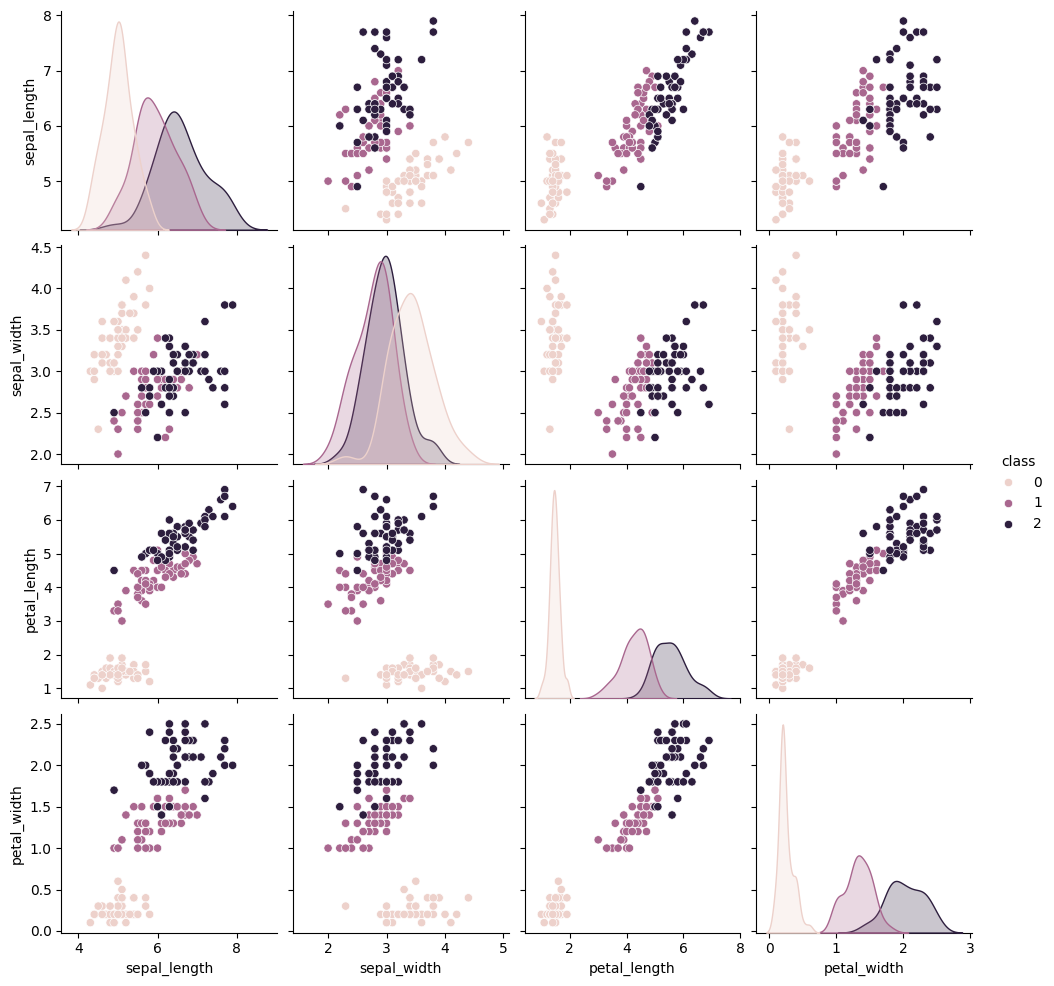

In [70]:
import seaborn as sns
sns.pairplot(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']], hue='class')

In [71]:
from scipy.stats import shapiro
# Verificar normalidade usando o teste de Shapiro-Wilk
def verifica_normalidade(dataframe, coluna):
    coluna_data = dataframe[coluna]
    # Realizar o teste de Shapiro-Wilk
    statistic, p_valor = shapiro(coluna_data)
    # Definir o nível de significância
    nivel_significancia = 0.1
    # Verificar se a hipótese nula de normalidade pode ser rejeitada
    if p_valor > nivel_significancia:
        print(f"A coluna '{coluna}' segue uma distribuição normal")
        return True
    else:
        print(f"A coluna '{coluna}' não segue uma distribuição normal")
        return False

In [72]:
# Chamando a função para verificar normalidade
for coluna in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
  if verifica_normalidade(df, coluna):
    df[coluna] = padronizar(df[coluna])#se for distribuição normal, padroniza
  else:#senão, normaliza
    df[coluna] = normalizar(df[coluna])

A coluna 'sepal_length' não segue uma distribuição normal
A coluna 'sepal_width' segue uma distribuição normal
A coluna 'petal_length' não segue uma distribuição normal
A coluna 'petal_width' não segue uma distribuição normal


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

y = df['class']
X = df.drop('class', axis=1)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
knn = KNeighborsClassifier(n_neighbors=27)

# Treinar o modelo kNN
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [76]:
y_pred = knn.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo KNN:", accuracy)

Acurácia do modelo KNN: 0.8


In [57]:
print("n=",len(y))
print("k=", (len(y))**0.5)

n= 150
k= 12.24744871391589


In [77]:
#testando o k ideal
for k in range(3, 51, 2):
  knn = KNeighborsClassifier(n_neighbors=k)
  # Treinar o modelo kNN
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  # Avaliar a acurácia do modelo
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Acurácia para k={k}:", accuracy)

Acurácia para k=3: 0.9666666666666667
Acurácia para k=5: 1.0
Acurácia para k=7: 1.0
Acurácia para k=9: 0.9333333333333333
Acurácia para k=11: 0.9333333333333333
Acurácia para k=13: 0.9666666666666667
Acurácia para k=15: 0.9
Acurácia para k=17: 0.8666666666666667
Acurácia para k=19: 0.9
Acurácia para k=21: 0.9
Acurácia para k=23: 0.8666666666666667
Acurácia para k=25: 0.8666666666666667
Acurácia para k=27: 0.8
Acurácia para k=29: 0.8
Acurácia para k=31: 0.8
Acurácia para k=33: 0.8333333333333334
Acurácia para k=35: 0.8333333333333334
Acurácia para k=37: 0.8333333333333334
Acurácia para k=39: 0.8333333333333334
Acurácia para k=41: 0.8666666666666667
Acurácia para k=43: 0.8
Acurácia para k=45: 0.8333333333333334
Acurácia para k=47: 0.8
Acurácia para k=49: 0.8333333333333334


In [78]:

# Selecionar o primeiro exemplo do conjunto de teste
exemplo = X_test.iloc[[0]]
saida_real = y_test.iloc[0]

# Fazer a previsão com o modelo treinado
previsao = knn.predict(exemplo)

# Imprimir a previsão e a saída real
print("Previsão:", previsao[0])
print("Saída Real:", saida_real)

Previsão: 1
Saída Real: 1


In [79]:
# Fazer previsões para todo o conjunto de teste
previsoes = knn.predict(X_test)

# Criar um DataFrame para comparar as previsões com as saídas reais
comparacao = pd.DataFrame({'Previsão': previsoes, 'Saída Real': y_test})

# Mostrar o DataFrame de comparação
comparacao

,Previsão,Saída Real
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1
